# Análise de Vendas de Café: Exploratory Data Analysis


## Introdução

Este projeto foi desenvolvido para realizar uma análise exploratória de dados **(EDA)** das vendas de uma cafeteria utilizando dados reais do período entre março de 2024 e março de 2025.

A análise busca identificar padrões de consumo, entender o comportamento dos clientes e extrair insights relevantes para decisões estratégicas de marketing, operação e precificação.

Embora seja um projeto introdutório, ele foi estruturado para refletir situações reais enfrentadas por empresas que utilizam dados para orientar decisões comerciais.

## Perguntas do Negócio

Ao longo da análise, busco responder perguntas como:

- Quais são os cafés mais vendidos em termos de quantidade e faturamento?
- Como as vendas variam ao longo do tempo (diariamente, mensalmente)?
- Existe padrão de sazonalidade nas vendas?
- Como o preço médio varia entre os diferentes tipos de café?
- Há dias da semana melhores para vendas?
- Quais oportunidades estratégicas podem ser extraídas desses padrões?

## Sobre o Dataset

O dataset contém registros de vendas entre **março/2024 e março/2025**.
As principais colunas são:

- **date**: data da venda
- **datetime**: hora da venda
- **cash_type**: forma de pagamento  
- **money**: valor da transação  
- **coffee_name**: tipo de café vendido  

Essas informações permitem análises tanto por **produto**, quanto **temporal** (dia, semana, mês).

## Importação das Bibliotecas

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração de estilo para os gráficos
sns.set(style="whitegrid")

## Carregamento dos Dados

Nesta etapa, monto o Google Drive e carrego o arquivo CSV contendo as vendas registradas ao longo do período analisado.

In [52]:
# Acesso ao Google Drive para acessar os arquivos
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Exploração Inicial do Dataset

Aqui verifico a estrutura geral do dataset, tipos de dados e possíveis valores faltantes.

In [53]:
# Carregar o dataset
file_path = '/content/drive/MyDrive/_Notebooks/Coffee_Sales/index_1.csv'
df1 = pd.read_csv(file_path)

In [54]:
print("Dataset preview:")
df1.head()

Dataset preview:


,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [55]:
# informações gerais: colunas, tipos, valores nulos
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3636 non-null   object 
 1   datetime     3636 non-null   object 
 2   cash_type    3636 non-null   object 
 3   card         3547 non-null   object 
 4   money        3636 non-null   float64
 5   coffee_name  3636 non-null   object 
dtypes: float64(1), object(5)
memory usage: 170.6+ KB


In [56]:
# verificar quantidade de valores nulos na coluna 'card'
df1['card'].isnull().sum()

np.int64(89)

## Limpeza e preparação básica
Nesta etapa padronizamos tipos, tratamos colunas de data e registramos dados ausentes relevantes.

#### Análise de Dados Ausentes

A coluna `card` contém alguns valores ausentes, o que é esperado, pois nem todas as transações possuem identificação do cartão ou cliente.
Como o foco desta análise está em **vendas, faturamento e comportamento dos produtos**, essa coluna não influencia as métricas principais e os valores ausentes **não comprometem o resultado**.
Por isso, optei por **manter os dados como estão**, sem necessidade de imputação ou remoção de linhas.

### Conversão de tipos

As colunas `date` e `datetime` estão como texto (object).  
Para facilitar análises temporais, converto ambas para o tipo `datetime64`.


In [57]:
# convertendo colunas para datetime
df1['date'] = pd.to_datetime(df1['date'])
df1['datetime'] = pd.to_datetime(df1['datetime'])

---

## Análise de Produto: Vendas por Tipo de Café

Nesta etapa, verifico quais cafés foram mais vendidos ao longo do período analisado. Essa informação ajuda a entender a demanda de cada produto e pode orientar decisões de estoque, preço e promoções.

### Contagem de vendas por produto

In [58]:
# Contar o número de vendas por tipo de café
vendas_por_cafe = df1['coffee_name'].value_counts().sort_values(ascending=False)

# Visualizar os valores
vendas_por_cafe


,count
coffee_name,
Americano with Milk,824
Latte,782
Americano,578
Cappuccino,501
Cortado,292
Hot Chocolate,282
Cocoa,243
Espresso,134


### Visualização: Vendas por Tipo de Café

A seguir, um gráfico de barras para facilitar a visualização dos produtos mais vendidos.

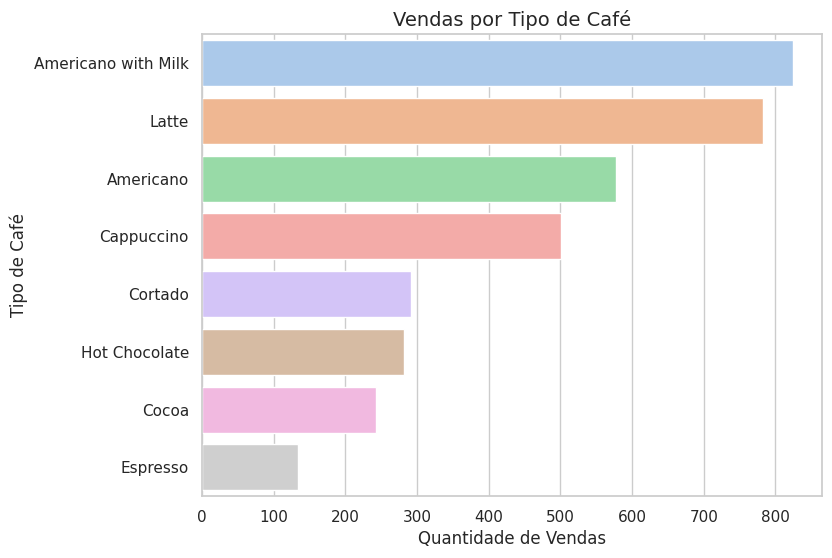

In [59]:
plt.figure(figsize = (8, 6))

sns.barplot(x = vendas_por_cafe.values,
            y = vendas_por_cafe.index,
            hue = vendas_por_cafe.index, # mantém cores diferentes para cada café
            palette = 'pastel')

plt.title('Vendas por Tipo de Café', fontsize=14)
plt.xlabel('Quantidade de Vendas')
plt.ylabel('Tipo de Café')
plt.show()

## Análise de Produto: Faturamento por Tipo de Café

Nesta etapa, analiso o faturamento total de cada produto.  
Enquanto o gráfico anterior mostra a **quantidade de vendas**, aqui o objetivo é entender **quais cafés geram mais receita**, o que é útil para decisões de preço, mix de produtos e estratégias comerciais.

In [60]:
# Agrupar o total de faturamento por tipo de café
faturamento_por_cafe = df1.groupby(
    'coffee_name')['money'].sum().sort_values(ascending=False)

# Visualizar os valores
faturamento_por_cafe

,money
coffee_name,
Latte,27866.30
Americano with Milk,25269.12
Cappuccino,18034.14
Americano,15062.26
Hot Chocolate,10172.46
Cocoa,8678.16
Cortado,7534.86
Espresso,2814.28


### Visualização: Faturamento por Tipo de Café

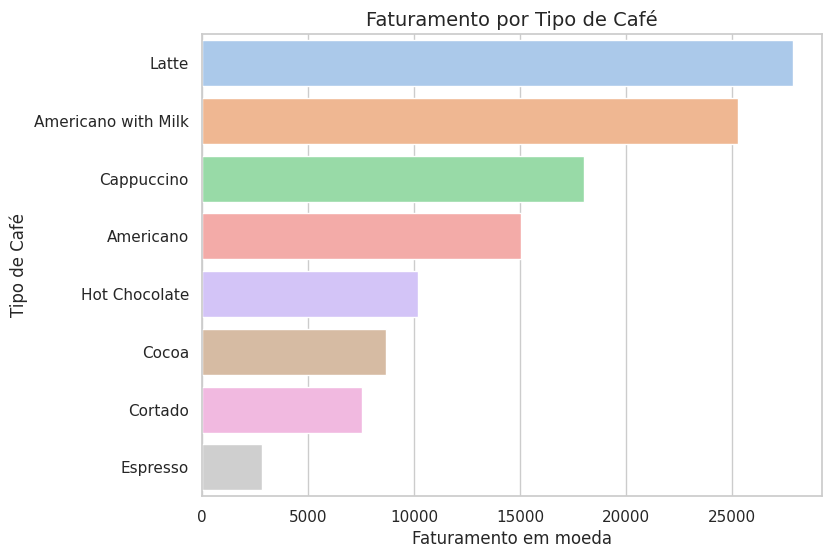

In [61]:
plt.figure(figsize=(8, 6))

sns.barplot(
    x=faturamento_por_cafe.values,
    y=faturamento_por_cafe.index,
    hue=faturamento_por_cafe.index,
    palette='pastel',
    legend=False)

plt.title('Faturamento por Tipo de Café', fontsize=14)
plt.xlabel('Faturamento em moeda')
plt.ylabel('Tipo de Café')
plt.show()

## Análise de Produto: Vendas de Café

Nesta primeira etapa da análise, o foco foi entender o comportamento de venda dos diferentes tipos de cafés. Foram analisadas duas perspectivas principais:

* Quantidade de vendas por produto
* Faturamento por produto

### Quantidade de vendas por produto

Os cafés mais vendidos no período foram:

- **Americano with Milk** – 824 unidades vendidas
- **Latte** – 782 unidades vendidas
- **Americano** – 578 unidades vendidas
- **Cappuccino** – 501 unidades vendidas
- **Cortado** – 292 unidades vendidas
- **Hot Chocolate** – 282 unidades vendidas
- **Cocoa** – 243 unidades vendidas
- **Espresso** – 134 unidades vendidas

Percebe-se que bebidas como **Americano with Milk**, **Latte** e **Americano** estão entre as mais populares, indicando uma preferência dos clientes por bebidas mais tradicionais e possivelmente de preço mais acessível.

### Faturamento por produto

Ao analisar o faturamento, observa-se que os produtos mais vendidos nem sempre são os que geram maior receita. Isso ocorre porque alguns cafés, mesmo vendendo menos unidades, possuem preços mais elevados, o que aumenta seu impacto no faturamento final.

Essas análises ajudam a identificar quais produtos são mais relevantes tanto em volume quanto financeiramente, servindo de base para decisões estratégicas de:

* Promoções
* Ajustes no mix de produtos
* Foco de marketing e vendas

---

## Preço Médio por Produto (ticket médio)

A seguir, o cálculo do preço médio por tipo de café, seguido pela visualização gráfica:

In [62]:
# Calcular o preço médio por tipo de café
preco_medio_por_cafe = df1.groupby('coffee_name')['money'].mean().sort_values(ascending=False)

# Mostrar o resultado
preco_medio_por_cafe

,money
coffee_name,
Hot Chocolate,36.072553
Cappuccino,35.996287
Cocoa,35.712593
Latte,35.634655
Americano with Milk,30.666408
Americano,26.059273
Cortado,25.804315
Espresso,21.002090


### Gráfico: Preço Médio por Tipo de Café

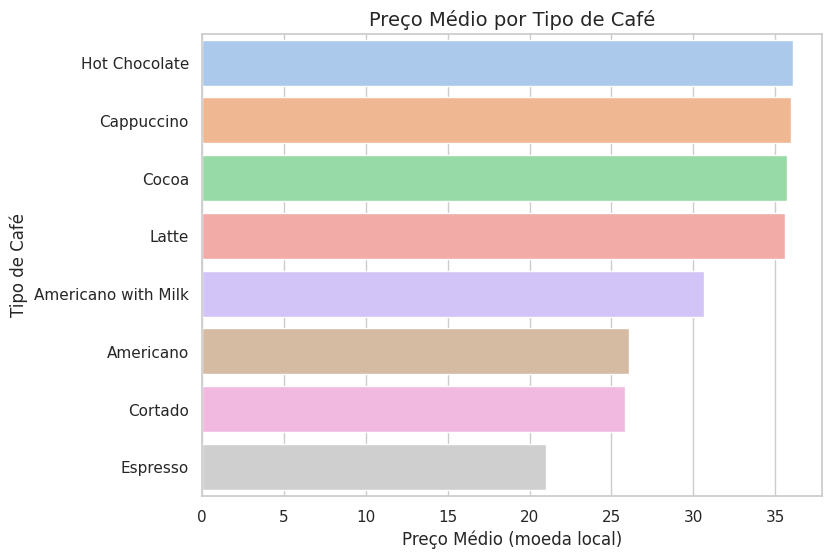

In [63]:
# Visualizar com um gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(
    x=preco_medio_por_cafe.values,     # valores do preço médio
    y=preco_medio_por_cafe.index,      # nomes dos cafés
    palette='pastel',
    hue=preco_medio_por_cafe.index,
    legend=False)

plt.title('Preço Médio por Tipo de Café', fontsize=14)
plt.xlabel('Preço Médio (moeda local)')
plt.ylabel('Tipo de Café')
plt.show()



## Análise do Preço Médio por Produto

Para complementar a análise de quantidade e faturamento, calculamos também o preço médio pago por cada tipo de café.
Isso ajuda a entender o *ticket médio* e perceber se, por exemplo, cafés mais caros vendem menos, mas compensam no faturamento.

- **Hot Chocolate** – preço médio de 36,07  
- **Cappuccino** – preço médio de 36,01  
- **Latte** – preço médio de 35,66  
- **Cocoa** – preço médio de 35,66  
- **Americano with Milk** – preço médio de 30,68  
- **Americano** – preço médio de 26,04  
- **Cortado** – preço médio de 25,82  
- **Espresso** – preço médio de 21,00  

Apesar de não liderarem o ranking de volume, **Hot Chocolate** e **Cappuccino** possuem os maiores tickets médios, contribuindo proporcionalmente mais para o faturamento total.
Já o **Espresso**, com preço médio mais baixo, pode funcionar como um produto de entrada, atraindo novos clientes.

---

# Análises Temporais


## Vendas e Faturamentos Diários

A seguir, analisamos o **comportamento diário** das vendas e do faturamento. Essa visão é fundamental para identificar sazonalidade, picos específicos ou tendências ao longo do período analisado.

In [64]:
# Converter a coluna 'date' (novamente, por segurança)
df1['date'] = pd.to_datetime(df1['date'])

# Agrupar por dia e calcular vendas e faturamento
daily = (df1.groupby(df1['date'].dt.date)
    .agg(vendas=('coffee_name', 'count'),
         faturamento=('money', 'sum'))
    .reset_index())


### Visualizações: Vendas e Faturamento Diários

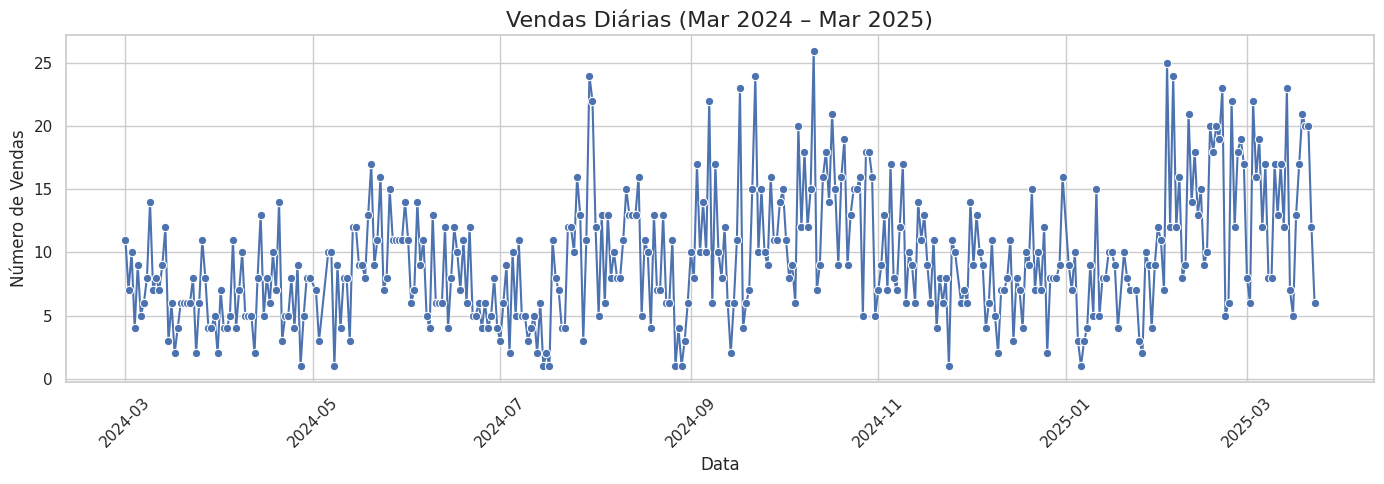

In [65]:
# Plot: Vendas Diárias
plt.figure(figsize=(14, 5))
sns.lineplot(data=daily, x='date', y='vendas', marker='o')
plt.title('Vendas Diárias (Mar 2024 – Mar 2025)', fontsize=16)
plt.xlabel('Data')
plt.ylabel('Número de Vendas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

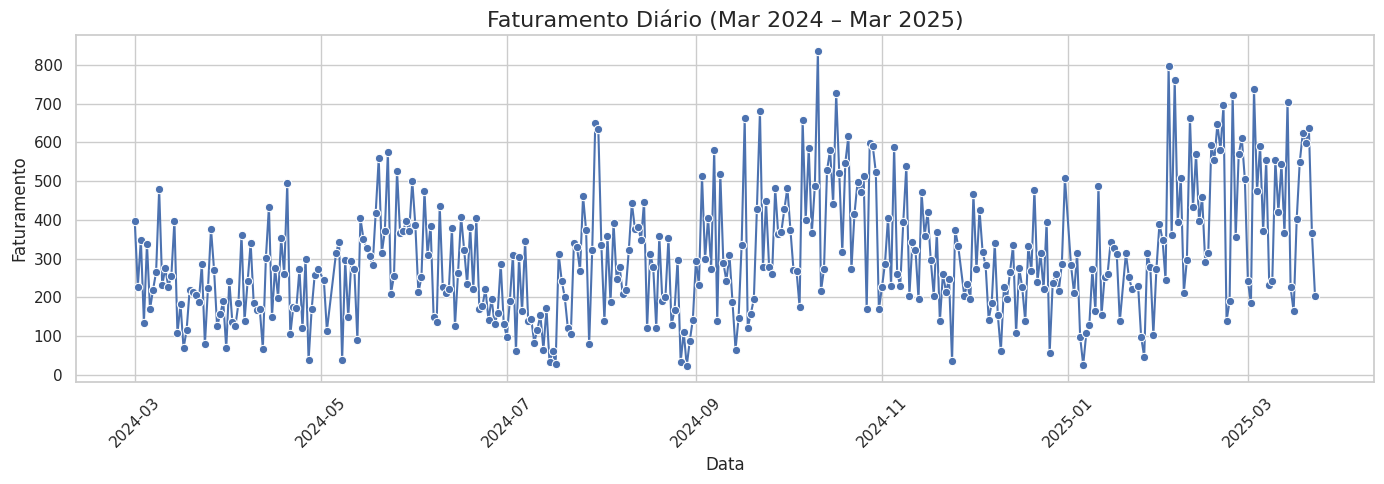

In [66]:
# Plot: Faturamento Diário
plt.figure(figsize=(14, 5))
sns.lineplot(data=daily, x='date', y='faturamento', marker='o')
plt.title('Faturamento Diário (Mar 2024 – Mar 2025)', fontsize=16)
plt.xlabel('Data')
plt.ylabel('Faturamento')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Análise Temporal de Vendas e Faturamento Diários

Ao olhar os gráficos de séries diárias, percebemos:

- **Tendência de alta** nos últimos meses do período (início de 2025).  
- Um **pico expressivo** em **outubro de 2024**, possivelmente indicando um evento especial, campanha ou aumento sazonal.
- **Alta variabilidade diária**, com vendas e faturamento oscilando bastante, o que pode estar relacionado a clima, fins de semana, feriados ou promoções específicas.

> Esses padrões sugerem que pode ser interessante aprofundar a análise por **dia da semana** e **por mês**, para identificar períodos de maior desempenho e otimizar estratégias comerciais.

---

## Vendas e Faturamento por Dia da Semana

Investigamos se há padrões recorrentes ao longo da semana (dias com maior movimento, tickets médios diferentes, etc.).






In [67]:
# Criar coluna com o dia da semana
df1['weekday'] = df1['date'].dt.day_name()

# Agrupar e calcular médias
weekday_summary = (df1.groupby('weekday')
    .agg(vendas_médias=('coffee_name', 'count'),faturamento_médio=('money', 'mean'))
    .reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])  # ordena
    .reset_index())

weekday_summary

,weekday,vendas_médias,faturamento_médio
0,Monday,561,31.952050
1,Tuesday,585,31.858769
2,Wednesday,510,31.555804
3,Thursday,520,31.687308
4,Friday,544,31.723640
5,Saturday,482,31.499004
6,Sunday,434,31.931014


### Visualização: Média de Vendas e Faturamento Médio por Dia da Semana

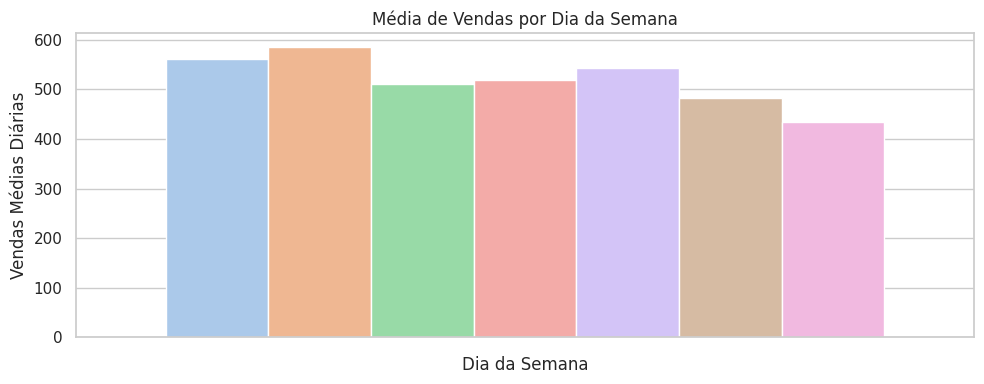

In [68]:
# Gráfico de vendas médias por dia da semana
plt.figure(figsize=(10, 4))
sns.barplot(hue='weekday',
            y='vendas_médias',
            data=weekday_summary,
            palette='pastel',legend=False)
plt.title('Média de Vendas por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Vendas Médias Diárias')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


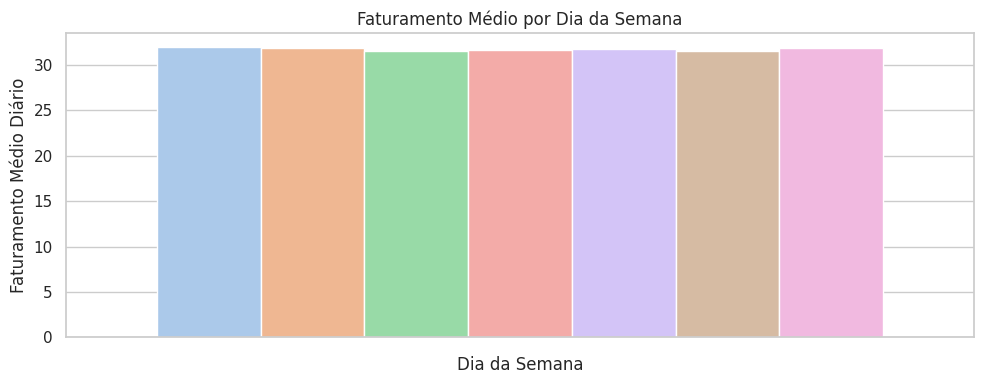

In [69]:
# Gráfico de faturamento médio por dia da semana
plt.figure(figsize=(10, 4))
sns.barplot(hue='weekday',
            y='faturamento_médio',
            data=weekday_summary,
            palette='pastel',legend=False)
plt.title('Faturamento Médio por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Faturamento Médio Diário')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Análise do Desempenho por Dia da Semana

Para entender melhor as oscilações diárias, calculamos o total de vendas e o faturamento médio por cada dia da semana e os insights principais foram:

- **Terças-feiras** (585 vendas) e **segundas-feiras** (561 vendas) são os dias com maior volume de vendas.
- **Domingos** apresentam o menor volume de vendas (434).
- O **faturamento médio** por venda é bastante estável ao longo da semana (cerca de 31–32 unidades monetárias), mas **domingos** e **segundas** têm os tickets médios um pouco mais altos.

> Esses padrões sugerem que ações promocionais podem ser usadas para reforçar vendas nos finais de semana, quando o movimento é menor.


## Vendas e Faturamento Mensal

Agora observamos a evolução agregada por mês no período analisado.

In [70]:
# Criar coluna de mês
df1['month'] = df1['date'].dt.to_period('M').dt.to_timestamp()

# Agrupar por mês
monthly = (df1.groupby('month')
    .agg(vendas=('coffee_name', 'count'),faturamento=('money', 'sum'))
    .reset_index())

monthly.head()

,month,vendas,faturamento
0,2024-03-01,206,7050.20
1,2024-04-01,196,6720.56
2,2024-05-01,267,9063.42
3,2024-06-01,227,7758.76
4,2024-07-01,237,6915.94


### Visualizações: Vendas e Faturamento Mensal

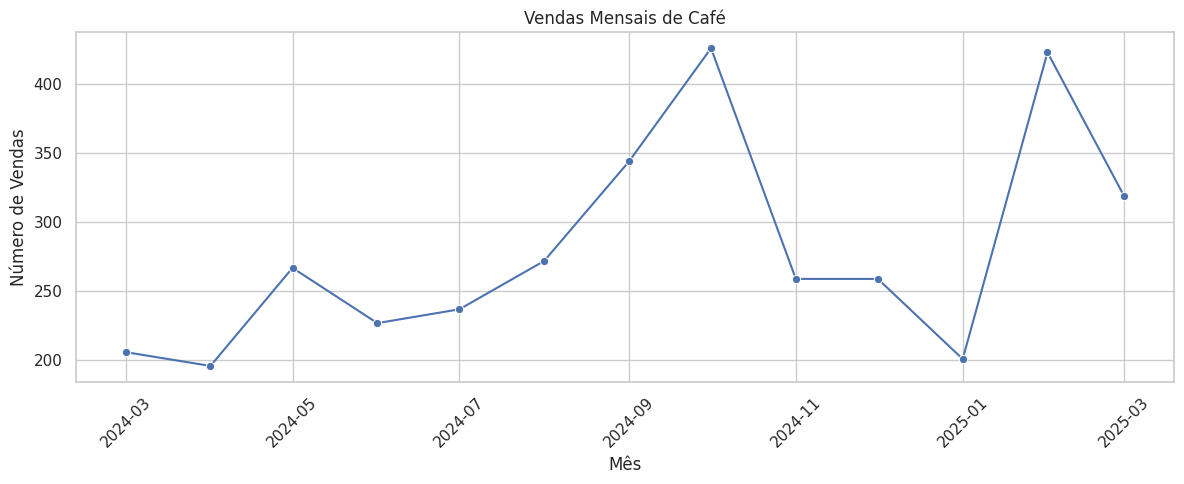

In [71]:
# Gráfico de vendas mensais
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly, x='month', y='vendas', marker='o')
plt.title('Vendas Mensais de Café')
plt.xlabel('Mês')
plt.ylabel('Número de Vendas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

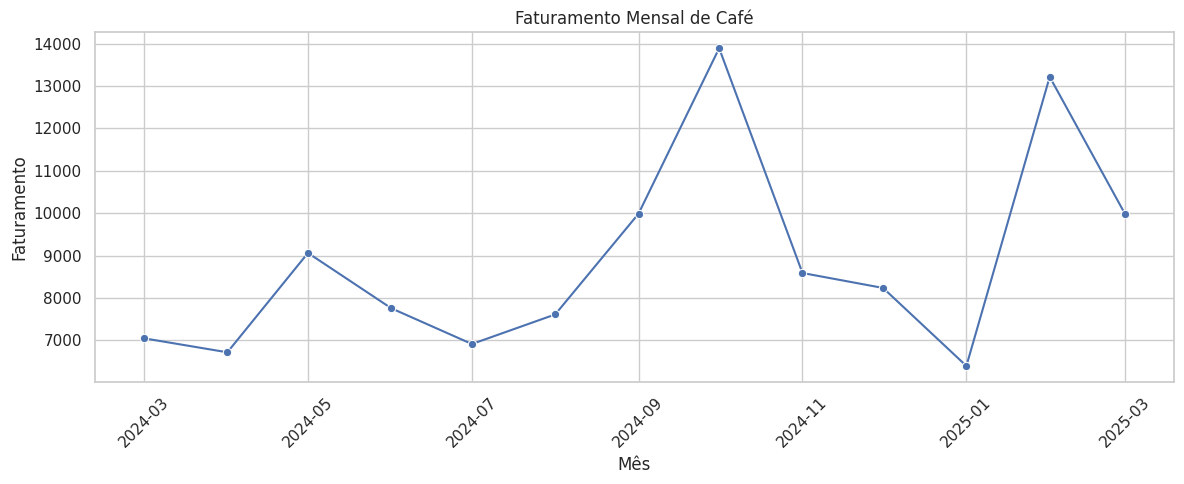

In [72]:
# Gráfico de faturamento mensal
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly, x='month', y='faturamento', marker='o')
plt.title('Faturamento Mensal de Café')
plt.xlabel('Mês')
plt.ylabel('Faturamento')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Análise Mensal de Vendas e Faturamento

Principais observações:

* **Maio de 2024** foi o mês com melhor desempenho com 267 vendas e faturamento de 9.063,42.

* **Abril de 2024** teve o menor volume, apenas 196 vendas.

* Junho e julho mostram estabilização após o pico de maio.

* Segundo pico em outubro de 2024, consistente com a análise diária.

####Insight:

> Replicar campanhas semelhantes às de maio e outubro pode melhorar meses mais fracos.

## Conclusão Geral e Recomendações

### Conclusão
O estudo apresentou uma visão completa do desempenho da cafeteria entre março de 2024 e março de 2025, considerando:

1. **Análise de Produtos**  
   - **Americano with Milk**, **Latte** e **Americano** são os campeões em volume de vendas e também estão entre os maiores faturamentos.  
   - **Cappuccino** e **Hot Chocolate** mesmo com volume menor, têm **ticket médio alto**, contribuindo de forma significativa para a receita.  
   - **Espresso* se destaca como item de entrada, com preço médio mais baixo e menor volume.

2. **Tendências Temporais**  
   - Pico de vendas e faturamento importantes: **maio e outubro de 2024**, indicando impacto de sazonalidades ou eventos especiais.  
   - Houve tendência de alta nos primeiros meses de 2025, sinalizando crescimento contínuo do negócio.  


3. **Desempenho Semanal e Mensal**  
   
   - **Terças-feiras** são o **melhor dia de vendas**.
   - Domingos têm o menor movimento.  
   - Os meses de menor venda (como abril)  podem receber ações para elevar o fluxo.

### Recomendações
1. **Promoções Sazonais**  
   - Planejar campanhas de marketing em torno de maio e outubro, aproveitando o histórico de picos de vendas.  
2. **Ofertas de “Porta de Entrada”**  
   - Destacar o *Espresso* em promoções de baixo custo para atrair novos clientes e incentivá-los a experimentar outras bebidas de maior ticket médio.  
3. **Campanhas Semanais**  
   - Oferecer descontos ou combos às terças-feiras (melhor dia de vendas) e ações especiais para atrair público aos domingos, quando o movimento é menor.  
4. **Análise de Eventos**  
   - Mapear feriados, datas comemorativas e eventos locais para replicar estratégias de sucesso em outros períodos do ano.  
5. **Acompanhamento Contínuo**  
   - Automatizar relatórios mensais para monitorar vendas e faturamento e ajustar rapidamente as ações de marketing.

---

### Próximos passos

Para evoluir o projeto:

> Integrar dados de custo para calcular margem de lucro por produto.  
> Analisar perfil de clientes utilizando a coluna `card` para campanhas de fidelização.  
> Explorar correlações com variáveis externas (clima, eventos) para refinar previsões de demanda.  






